<a href="https://colab.research.google.com/github/preetham3216/info5731-fall2021/blob/main/INFO5731_Assignment_Four_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [ ]:
# Write your code here
import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English
parser = English()
import nltk
nltk.download('wordnet')

def texttoken(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

from nltk.corpus import wordnet as wn
def gl(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def gl2(word):
    return WordNetLemmatizer().lemmatize(word)
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
def lda_data(text):
    return [gl(token) for token in [token for token in [token for token in texttoken(text) if len(token) > 4] if token not in en_stop]]

import random
text_data = []
with open(r'C:\Users\preet\OneDrive\Desktop\fdf.csv') as f:
    for line in f:
        tokens = lda_data(line)
        if random.random() > .100:
            print(tokens)
            text_data.append(tokens)

['ï»¿reviews', 'analysis']
['neutral']
['neutral']
['neutral']
['course', 'tease', 'certain', 'thing', 'summary', 'though', 'truth', 'especially', 'consider', 'third', 'movie', 'quite', 'fantastical', 'intend', 'scene', 'already', 'imagine', 'still', 'quite', 'highlight', 'wonder', 'trailerteaser', 'reveal', 'character', 'movie', 'watch', 'screen', 'respect', 'marvel', 'feige', 'anyone', 'involve', 'first', 'minute', 'chinese', 'throw', 'chinese', 'slang', 'throughout', 'touch', 'authenticity', 'immigrant', 'america', 'anywhere', 'world', 'greek', 'germanenglish', 'prone', 'sarcastic', 'really', 'think', 'thing', 'major', 'representation', 'especially', 'nowadays', 'antiasian', 'hatecrime', 'people', 'blame', 'china', 'people', 'china', 'virus', 'movie', 'topic', 'entertainment', 'every', 'promo', 'interview', 'actor', 'involve', 'something', 'mention', 'theatrical', 'release', 'instead', 'black', 'widow', 'treatment', 'available', 'disney', 'cinema', 'issue', 'watch', 'screen', 'dissa

C:\Users\preet\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')
import gensim
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model10.gensim')

C:\Users\preet\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.036*"neutral" + 0.027*"shang" + 0.020*"movie" + 0.017*"marvel" + 0.014*"great" + 0.012*"really" + 0.009*"though" + 0.009*"positive" + 0.007*"character" + 0.007*"black"')
(1, '0.020*"marvel" + 0.019*"character" + 0.018*"action" + 0.016*"scene" + 0.013*"fight" + 0.013*"movie" + 0.013*"shangchi" + 0.010*"story" + 0.009*"positive" + 0.008*"asian"')
(2, '0.020*"character" + 0.015*"movie" + 0.014*"positive" + 0.013*"watch" + 0.009*"would" + 0.009*"first" + 0.008*"marvel" + 0.007*"truly" + 0.006*"fight" + 0.006*"could"')
(3, '0.011*"shang" + 0.007*"story" + 0.007*"great" + 0.007*"battle" + 0.007*"mystical" + 0.007*"sister" + 0.007*"child" + 0.004*"positive" + 0.004*"shangchi" + 0.004*"dragon"')
(4, '0.008*"positive" + 0.008*"absolutely" + 0.004*"visual" + 0.004*"action" + 0.004*"shang" + 0.004*"little" + 0.004*"expect" + 0.004*"surprise" + 0.004*"course" + 0.004*"superb"')
(5, '0.026*"movie" + 0.012*"marvel" + 0.012*"action" + 0.012*"shangchi" + 0.009*"story" + 0.008*"black" + 0.008*"f

In [ ]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

The first topic consists of most words like wuhancoronovirus , china , people as most frequent words in this topic we can describe the topic as globalstatus.

The second topic consists of words like wuhanvirus, china , postive and can describe the topic as most of the people in china were dignosed as postive in china.

The third topic consists of people , china, president and can be described as quarantine for this topic.

The forth topic is described as most of the people were dignosed as postive from China and Russia.

The fifth topic describes that the virus has been passed to America.

The sixth topic describes about the virus is the orgin point from china.

The seventh topic describes about the country china to be quarantined.

The eight topic describes about deaf, dumb and blind people are affected more.

The ninth topic describes about due to coronovirus whitehouse has passed the news to be quarantined.

The tenth topic describes about due to covid people are enjoying makeing cu

C:\Users\preet\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Question 2: Sentiment Analysis

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
import pandas as pd
dfrm=pd.read_csv(r'C:\Users\preet\OneDrive\Desktop\fdf.csv')
dfrm = dfrm.dropna()
print(dfrm.shape)

(424, 2)


In [ ]:
import nltk
dfrm['Reviews'] = dfrm['Reviews'].str.replace('[^\w\s]','')  #removal of punctuation
dfrm['Reviews'] = dfrm['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))#lower case
from nltk.corpus import stopwords #removal of stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
dfrm['Reviews'] = dfrm['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dfrm.head()

<ipython-input-224-9b356515831f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dfrm['Reviews'] = dfrm['Reviews'].str.replace('[^\w\s]','')  #removal of punctuation
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\preet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Reviews,Analysis
3,course riff tease make fun certain thing summa...,Positive
4,expect vision film along line snake eye date b...,Positive
6,find film engage start finish couldnt get eye ...,Positive
7,enjoy series wong karwei film great see star m...,Positive
8,ten year since shangchiliu charm stoic last sa...,Positive


In [ ]:
Encoder = LabelEncoder()
dfrm['Analysis'] = Encoder.fit_transform(dfrm['Analysis'])

Tfidf_vect = TfidfVectorizer(max_features=500)   
d = Tfidf_vect.fit_transform(dfrm['Reviews'])

Train_X, Test_X, Train_Y, Test_Y = train_test_split(d,dfrm['Analysis'],test_size=0.5,random_state=56)

Train_X_Tfidf = Train_X
Test_X_Tfidf = Test_X
Naive = MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
predictions_NB = Naive.predict(Test_X_Tfidf)
target_names = ['Positive', 'Negative', 'Neutral']
print(classification_report(Test_Y, predictions_NB,target_names=target_names))

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00        14
    Negative       0.00      0.00      0.00         2
     Neutral       0.92      1.00      0.96       196

    accuracy                           0.92       212
   macro avg       0.31      0.33      0.32       212
weighted avg       0.85      0.92      0.89       212



C:\Users\preet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\preet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\preet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

from sklearn import svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
predictions_SVM = SVM.predict(Test_X_Tfidf)
print(classification_report(Test_Y, predictions_SVM,target_names=target_names))

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00        14
    Negative       0.00      0.00      0.00         2
     Neutral       0.92      1.00      0.96       196

    accuracy                           0.92       212
   macro avg       0.31      0.33      0.32       212
weighted avg       0.85      0.92      0.89       212



C:\Users\preet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\preet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\preet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Question 3: House price prediction

(40 points). You are required to build a regression model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

In [ ]:
data_train = pd.read_csv(r"C:\Users\preet\Downloads\assignment4-question3-data (2)\train.csv")
data_test = pd.read_csv(r"C:\Users\preet\Downloads\\assignment4-question3-data (2)\test.csv")

In [ ]:
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


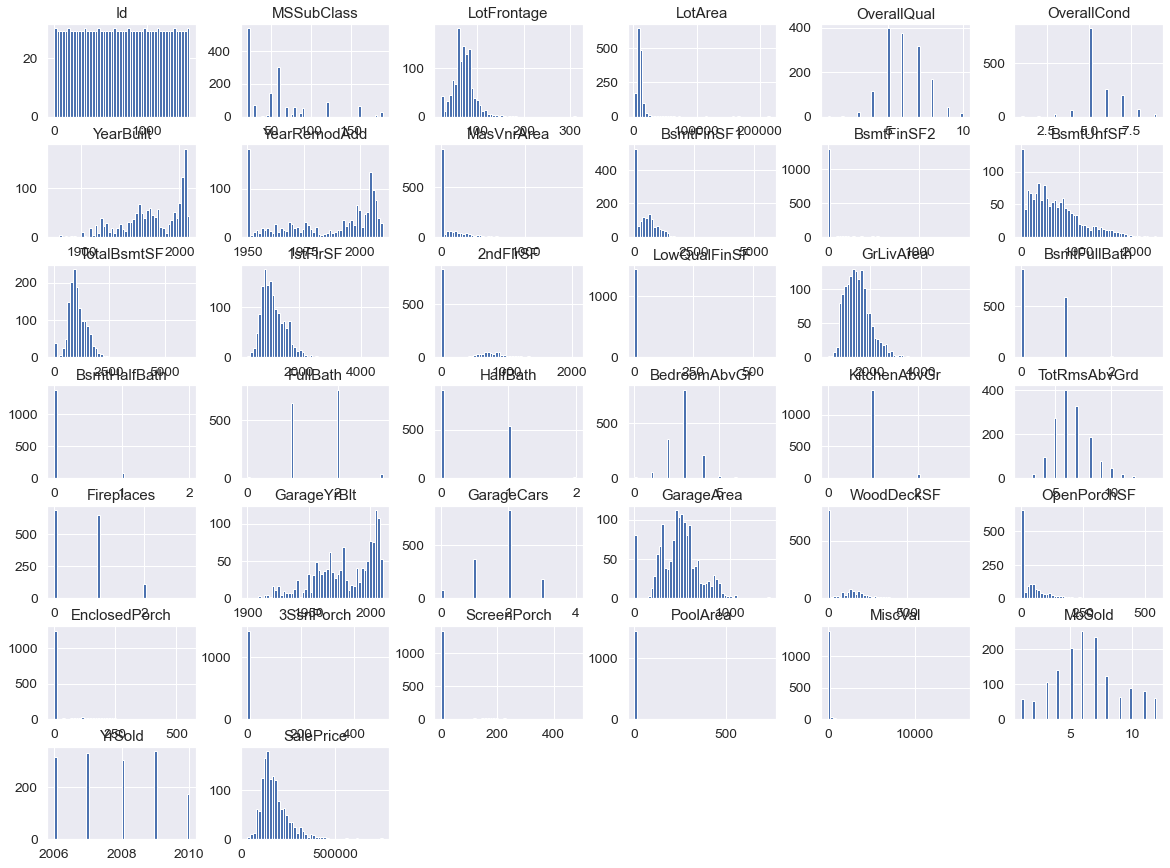

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
data_train.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [ ]:
corr = data_train.corr()
corr["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

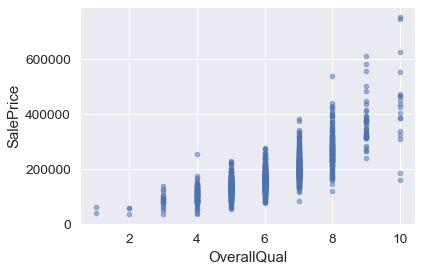

In [ ]:
data_train.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

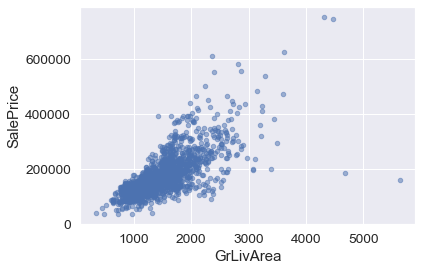

In [ ]:
data_train.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

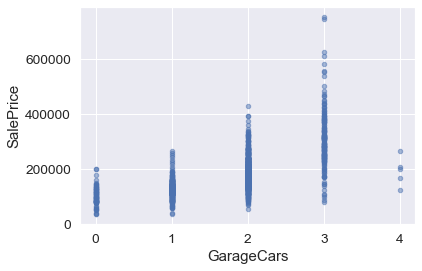

In [ ]:
data_train.plot(kind="scatter", x="GarageCars", y="SalePrice", alpha=0.5)

In [ ]:
data_train.fillna(train_dataset.mean(), inplace = True)
data_test.fillna(test_dataset.mean(), inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
columns = ('GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')
for column in columns:
    encoder = LabelEncoder()
    encoder.fit(list(data_train[column].values))
    data_train[column] = encoder.transform(list(data_train[column].values))

In [ ]:
for column in columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(data_test[column].values))
    data_test[column] = encoder_test.transform(list(data_test[column].values))

In [ ]:
x_values = data_train[data_train.columns[:80]] 

In [ ]:
x_test_values = data_test[data_test.columns[:80]]

In [ ]:
y_values = data_train['SalePrice']

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_values, y_values)
lr.score(x_values, y_values)

0.8684308882928182

In [ ]:
pd.DataFrame({'Predicted House Price Values': lr.predict(x_test_values)})

,Predicted House Price Values
0,61614.224093
1,112285.358887
2,117864.845492
3,136198.148543
4,136108.310920
...,...
1454,29256.215621
1455,5724.621674
1456,95261.555609
1457,70581.450255
